## RECOMMENDATION SYSTEM

It is a subclass of information filtering system that provide suggetions for items that one are most pertinent 
to a particular user. Information filteering system that seeks to predict the rating or the preferences a user might
give toan item.

It is an algorithm that suggest relevant items to users.

types of Recommendation system : 
    1 - collabarative 
    2 - content based
    3 - Demographic based
    4 - Utility based
    5 - knowledge based
    6 - Hybrid Recommendation sys.

Recommendation system typically first produce an inventory of available content and then filter it in line with thier
content moderation policies after which they pair the inventory down to only the item users are most likely to be  
interested in.
 
 Recommender systems are trained to understand the preferences, previous decisions, and characteristics of people and products using data gathered about their interactions. These include impressions, clicks, likes, and purchases. Because of their capability to predict consumer interests and desires on a highly personalized level, recommender systems are a favorite with content and product providers. They can drive consumers to just about any product or service that interests them, from books to videos to health classes to clothing.

How a recommender model makes recommendations will depend on the type of data you have. If you only have data about which interactions have occurred in the past, you’ll probably be interested in collaborative filtering. If you have data describing the user and items they have interacted with (e.g. a user’s age, the category of a restaurant’s cuisine, the average review for a movie), you can model the likelihood of a new interaction given these properties at the current moment by adding content and context filtering. 

PAIRWISE DISTANCES: 
                 
This method takes either a vector array or a distance matrix, and returns a distance matrix. If the input is a vector array, the distances are computed. If the input is a distances matrix, it is returned instead.
This method provides a safe way to take a distance matrix as input, while preserving compatibility with many other algorithms that take a vector array.
If Y is given (default is None), then the returned matrix is the pairwise distance between the arrays from both X and Y. 


COSINE SIMILARITY :
                  
It meaure the similarity between two vectors of an inner product space .It is maseard by the cosine of the angle between
two vectors and determines wheather two vectors are pointing in roughly the same direction or not.

# importing librabries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Q.

Problem statement.


Build a recommender system by using cosine simillarties score.
On book data

In [2]:
# reading the data

df=pd.read_csv(r"C:\Users\ABC\Downloads\book (1).csv",encoding=('ISO-8859-1'))

In [3]:
df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


# EDA

In [4]:
# drop unnecessary column
df_1=df.drop(['Unnamed: 0'],axis=1)
df_1

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [5]:
#Renaming the colums
df_1.columns = ["UserID","BookTitle","BookRating"]
df_1

,UserID,BookTitle,BookRating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [6]:
# sort by user id
df_1=df_1.sort_values('UserID')

In [7]:
# sort by book title
df_1.sort_values('BookTitle')

,UserID,BookTitle,BookRating
4904,2106,"Jason, Madison &amp",8
4906,2106,Other Stories;Merril;1985;McClelland &amp,6
4905,2106,Repairing PC Drives &amp,4
4404,1805,'48,7
9230,161737,'O Au No Keia: Voices from Hawai'I's Mahu and ...,8
...,...,...,...
5119,2222,"\Surely You're Joking, Mr. Feynman!\: Adventur...",8
4952,2110,"\Well, there's your problem\: Cartoons",9
2385,278851,iI Paradiso Degli Orchi,7
835,277439,stardust,5


In [8]:
#sort by book rating
df_1.sort_values('BookRating')

,UserID,BookTitle,BookRating
4532,1903,Time and Chance,1
5660,2488,A Country Courtship (Zebra Regency Romance),1
4241,1674,American Gods: A Novel,1
5021,2132,Kiss of the Highlander,1
115,276853,A Kiss Remembered,1
...,...,...,...
100,276847,"Prize Stories, 1987: The O'Henry Awards",10
101,276847,"Rich Dad, Poor Dad: What the Rich Teach Their ...",10
102,276847,The Pillars of the Earth,10
60,276822,LONESOME DOVE,10


In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2401 to 2397
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      10000 non-null  int64 
 1   BookTitle   10000 non-null  object
 2   BookRating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 312.5+ KB


In [10]:
# check for no.of user id 
df_1['UserID'].nunique()

2182

In [11]:
# check for no.of books 
df_1['BookTitle'].nunique()

9659

In [12]:
# check for ratings given by users
df_1['BookRating'].unique()

array([ 5,  7,  6, 10,  9,  3,  8,  4,  2,  1], dtype=int64)

In [13]:
df_1['BookRating'].nunique()

10

In [14]:
#checking for how many books read by per user
df_1['UserID'].value_counts()

3757      523
162052    214
2276      212
4017      156
277427    150
         ... 
3800        1
3798        1
739         1
3789        1
3934        1
Name: UserID, Length: 2182, dtype: int64

In [15]:
# maximum ratings given by user to books
df_1['BookRating'].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: BookRating, dtype: int64

# rating count

<function matplotlib.pyplot.show(close=None, block=None)>

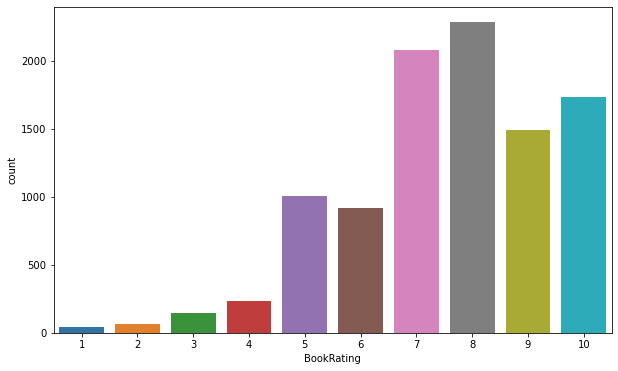

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(x='BookRating',data=df_1)
plt.show

from above plot we can say that most of the rating is given in between 7 and 8

In [17]:
df_1['BookTitle'].value_counts()

Fahrenheit 451                                    5
The Subtle Knife (His Dark Materials, Book 2)     4
Stardust                                          4
Charlie and the Chocolate Factory                 4
Ender's Game (Ender Wiggins Saga (Paperback))     4
                                                 ..
The Littles to the Rescue (Littles)               1
When I Grow Up (Little Look-Look)                 1
The Crying Child                                  1
SABLE MOON                                        1
A Treasury of Irish Myth, Legend, and Folklore    1
Name: BookTitle, Length: 9659, dtype: int64

In [18]:
df_1['BookTitle'].unique()

array(['Wings',
       'The Western way: A practical guide to the Western mystery tradition',
       'Ancient Celtic Romances', ..., 'A corrente de Trewis Scott',
       'As valkÃ\xadrias',
       'A Treasury of Irish Myth, Legend, and Folklore'], dtype=object)

In [19]:
#making table for dummies
book=df_1.pivot_table(index='UserID',
               columns='BookTitle',
               values='BookRating').reset_index(drop=True)

In [20]:
book

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# fill nan values with 0 to interpret the whole data
book.fillna(0,inplace=True)

book

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
book.shape

(2182, 9659)

# we have 2182 unique users and 9659 books from above table 

# COSINE SIMILARITY

In [23]:
# libraries for recommendation 
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [24]:
# checking similarity between users using metric as 'cosine similarity'

sim = 1-pairwise_distances(book.values,metric='cosine')

sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [25]:
# saving array in a dataframe 

new_sim=pd.DataFrame(sim)

In [26]:
new_sim

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
# set user id as columns name as well as index 

new_sim.index=df_1.UserID.unique()
new_sim.columns=df_1.UserID.unique()
new_sim

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
# cheking for first 5 obeservations if any similarity
new_sim.iloc[0:5,0:5]

,8,9,10,12,14
8,1.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0
14,0.0,0.0,0.0,0.0,1.0


In [29]:
#fill diagonal value as " 0 " , to avoid similarity with same user id (self)

np.fill_diagonal(sim,0,wrap=True)

# cheking  obeservations if any similarity

new_sim

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# finding Most Similar Users by index max value maximum value 

print(new_sim.idxmax(axis=1)[26])

print(new_sim.max(axis=1).sort_values(ascending=False).head(50))

8
3951      1.000000
1559      1.000000
162063    1.000000
278206    1.000000
2070      1.000000
2355      1.000000
277284    1.000000
278161    1.000000
276934    1.000000
278131    1.000000
278110    1.000000
162004    1.000000
705       1.000000
698       1.000000
160926    1.000000
933       1.000000
1326      1.000000
2576      1.000000
276850    1.000000
3952      1.000000
161645    1.000000
1348      0.752577
276780    0.707107
86        0.707107
278675    0.668965
276800    0.668965
277244    0.662266
278244    0.662266
278197    0.613941
278013    0.613941
3601      0.549972
277619    0.549972
277585    0.515325
277622    0.515325
276814    0.502571
277240    0.502571
278648    0.500000
277938    0.498464
2077      0.498464
508       0.495904
3874      0.495904
278012    0.476290
276744    0.476290
2520      0.463241
4225      0.463241
4049      0.453638
4207      0.453638
1192      0.437426
277660    0.437426
161880    0.384900
dtype: float64


1 represents that the two user ID have read the same books

for id 26 there is no similar id ,thats why it showed to first index (id) as 8

# checking similarities from the above list

In [31]:

print(new_sim.idxmax(axis=1)[1348])

2576


In [32]:
# userid 2576 is most similar to userid 1348 
# checking for books read by  above id's and recommend if  any similar 
reader = df_1[(df_1['UserID']==1348) | (df_1['UserID']==2576)]
reader

,UserID,BookTitle,BookRating
3915,1348,Fantastic Beasts and Where to Find Them,7
3916,1348,Stardust,8
5699,2576,Stardust,10


from above we can say that, stardust is a common book read by both userid it means they are similar in choice of reading books.
 userid 1348 reads one more book so we can suggest that book to userid 2576 


# BOOK TITLE - ' Fantastic Beasts and Where to Find Them ' recommend to userid 2576

In [33]:
#checking for new userid
print(new_sim.idxmax(axis=1)[19])

278418


In [34]:
# userid 19 is most similar to userid 278418
# checking for books read by  above id's and recommend if  any similar

reader = df_1[(df_1['UserID']==19) | (df_1['UserID']==278418)]
reader.head(10)

,UserID,BookTitle,BookRating
2417,19,The Murder Book,7
1982,278418,City of Bones,7
1992,278418,Absolute Zero,5
1983,278418,Lucky You,5
1984,278418,CAT'S EYE,4
1985,278418,The Handmaid's Tale,5
1988,278418,The Murder Book,6
1987,278418,Blood Test,7
1981,278418,Private Eyes (Alex Delaware Novels (Paperback)),9
1989,278418,When the Bough Breaks,7


 from above table, "the murder book"  is coomon book read by this two readers it means they are similar in choice of reading books.Here userid 278418 reads more books than userid 19 
So we can suggest more number of books to userid 19 according to higher ratings.


# Book title 'Private Eyes (Alex Delaware Novels (Paperback))','City of Bones','Blood Test','When the Bough Breaks'are recommend to userid 19 by ratings.

In [35]:

print(new_sim.idxmax(axis=1)[86])

276780


In [36]:
# userid 86 is most similar to userid 276780
# checking for books read by  above id's and recommend if  any similar

reader = df_1[(df_1['UserID']==86) | (df_1['UserID']==276780)]
reader

,UserID,BookTitle,BookRating
2446,86,Airframe,4
26,276780,Wild Animus,7
27,276780,Airframe,7


# we recommend book title " wild animus" to userid 86 

In [37]:
print(new_sim.idxmax(axis=1)[276800])

278675


In [38]:
# userid 276800 is most similar to userid 278675
# checking for books read by  above id's and recommend if  any similar

reader = df_1[(df_1['UserID']==276800) | (df_1['UserID']==278675)]
reader

,UserID,BookTitle,BookRating
39,276800,Pigs in Heaven,7
2291,278675,Martha Stuart's Better Than You at Entertainin...,10
2292,278675,Pigs in Heaven,9


# we recommend book title " Martha Stuart's Better Than You at Entertainin... " to userid 276800 

In [39]:
print(new_sim.idxmax(axis=1)[3601])

277619


In [40]:
# userid 3601 is most similar to userid 277619
# checking for books read by  above id's and recommend if  any similar

reader = df_1[(df_1['UserID']==3601) | (df_1['UserID']==277619)]
reader

,UserID,BookTitle,BookRating
6867,3601,The Littlest Christmas Tree: A Tale of Growing...,7
6868,3601,The Real Mother Goose,7
6869,3601,Christina Katerina and the Time She Quit the F...,8
1015,277619,The Real Mother Goose,8


# we recommend book title "Christina Katerina and the Time She Quit the F... " to userid 277619

In [41]:
print(new_sim.idxmax(axis=1)[161880])

277687


In [42]:
# userid 161880 is most similar to userid 277687
# checking for books read by  above id's and recommend if  any similar
reader = df_1[(df_1['UserID']==161880) | (df_1['UserID']==277687)]
reader

,UserID,BookTitle,BookRating
9457,161880,The Music Lesson : A Novel,7
9455,161880,The Wreck of the Whaleship Essex,7
9454,161880,I Myself Have Seen It: The Myth of Hawai'i,6
9456,161880,Confessions of a Pagan Nun : A Novel,9
9452,161880,Interpreter of Maladies,8
9451,161880,When the Sacred Ginmill Closes (Matthew Scudde...,6
9450,161880,The Revenge of the Hound,6
9453,161880,Blue Ridge,9
1102,277687,Interpreter of Maladies,6


Here userid 161880 reads more books than userid 19 So we can suggest more number of books to userid 277687
according to higher ratings.

# we recommend book titles "Blue Ridge","Confessions of a Pagan Nun : A Novel","The Music Lesson : A Novel" ,"The Wreck of the Whaleship Essex" to userid 277687

In [43]:
print(new_sim.idxmax(axis=1)[4225])

2520


In [44]:
# userid 4225 is most similar to userid 2520
# checking for books read by  above id's and recommend if  any similar
reader = df_1[(df_1['UserID']==4225) | (df_1['UserID']==2520)]
reader

,UserID,BookTitle,BookRating
5670,2520,Tiger Prince,10
5671,2520,Dogsong,10
8224,4225,No Marriage of Convenience (Avon Romantic Trea...,6
8225,4225,Big Bad Wolfe: At The Altar! (By Request 2'S) ...,6
8226,4225,A Treasure Worth Seeking,5
8223,4225,Wrong Man ... The Right Time (Silhouette Speci...,6
8222,4225,Tiger Prince,10


Here userid 4225 reads more books than userid 2520 So we can suggest more number of books to userid 2520
according to higher ratings.

# we recommend book titles " Big Bad Wolfe: At The Altar! (By Request 2'S) ..","No Marriage of Convenience (Avon Romantic Trea..." ,"Wrong Man ... The Right Time (Silhouette Spec" to userid 2520
# also we can recommend book to userid 4225 as "Dogsong" as both have similarty in them .

# conclusion

Our data contains userid, booktitle and ratings given by the users (readers) and about 10000 rows.In wich we have 2182unique readers and 9659 book titles.Then we check for how many books read by each user also check for ratings given by userid and it found in between 7 and 8 avg.
Then we use pivot table to organize the data in such a way that , on row level we set userId, on column level we set book
titles which we are going to be recommend and put values as ratings given by users. we get the result like  transactional databut here we are gone a use user user based relation for recommendation.

Then we use pairwise distance by method cosine similarity to check how much two users are similar to each other,
except with self(1-pairwise distance ) and fill nan values with 0 for interpretation.
Then we check for  maximum correlated users by idmax and max method ,this userId are then used to see which 
userid is related to other one. Then we check books read by each user and their ratings.

Finally we recommend some books to similar userid according to the ratings by user user based recommendation. 